# Classify turbines in KP

In [1]:
# Load the amrwind-frontend module
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Load the libraries
import amrwind_frontend  as amrwind
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy             as np
import math
import pandas as pd
import postproamrwindsample as ppsample
import time
import utm
from IPython.display import display, Markdown, Latex

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
def getTurbSubset(csvfile, suffix):
    # Load the data from the database of all turbines
    allturbsdf = pd.read_csv(csvfile, low_memory=False)
    # Get just the King Plains turbines
    subset = [] 
    for x in allturbsdf.iterrows():
        if x[1]['# name'].endswith(suffix):
            subset.append(x[1])
    subsetdf = pd.DataFrame(subset[:])
    return subsetdf

def getTurbSubsetXY(csvfile, suffix, xlim=[-np.finfo(np.float64).max, np.finfo(np.float64).max], ylim=[-np.finfo(np.float64).max, np.finfo(np.float64).max]):
    # Load the data from the database of all turbines
    allturbsdf = pd.read_csv(csvfile, low_memory=False)
    # Get just the King Plains turbines
    subset = [] 
    for x in allturbsdf.iterrows():
        xy = [float(x[1][' x']), float(x[1][' y'])]
        if x[1]['# name'].endswith(suffix) and ((xlim[0] <= xy[0]) and (xy[0]<=xlim[1]) and (ylim[0]<=xy[1]) and (xy[1]<=ylim[1])):
            #print(x[1])
            subset.append(x[1])
    subsetdf = pd.DataFrame(subset[:])
    return subsetdf

getturbnames = lambda df: [x[1]['# name'] for x in df.iterrows()]

def getTurbCategoryList(csvfile, suffix, limitdict):
    allturbs = []
    for box in limitdict['bboxes']:
        turbinbox = getturbnames(getTurbSubsetXY(csvfile, suffix, xlim=box[0], ylim=box[1]))
        allturbs += turbinbox
    return allturbs


In [3]:
summitcsv    = 'UnstableABL_farmrun_turbines.csv'

In [4]:
KPturbdf = getTurbSubset(summitcsv, '-KP')
AFturbdf = getTurbSubset(summitcsv, '-AF')

In [5]:
frontrow = {'label':'frontrow',
            'bboxes':[[[640000, 650000], [4025000, 4026500]],
                      [[638500, 640000], [4026000, 4027500]],
                      [[634900, 638500], [4027500, 4028500]],
                     ],
            'plotargs':{'facecolor':'b', 'alpha':0.5}, #{'linewidth':1, 'edgecolor':'r', 'facecolor':'none'}
           }

AFwaked  = {'label':'AFwaked',
            'bboxes':[
                      [[633000, 634900], [4027500, 4028500]],
                      [[630000, 633000], [4029000, 4029900]],
                     ],
            'plotargs':{'facecolor':'pink', 'alpha':0.75}, #{'linewidth':1, 'edgecolor':'r', 'facecolor':'none'}
           }

midrow   = {'label':'midrow',
            'bboxes':[[[640000, 650000], [4026600, 4029500]],
                      [[637500, 640000], [4028500, 4029500]],
                      [[633000, 637500], [4028500, 4030500]],
                      [[630000, 633000], [4029900, 4031500]],
                     ],
            'plotargs':{'facecolor':'lightblue', 'alpha':0.5}, #{'linewidth':1, 'edgecolor':'r', 'facecolor':'none'}
           }

backrow  = {'label':'backrow',
            'bboxes':[[[637500, 650000], [4029500, 4032500]],
                      [[633500, 637500], [4030500, 4032500]],
                      [[631000, 633500], [4031500, 4033500]],
                     ],
            'plotargs':{'facecolor':'cyan', 'alpha':0.5}, #{'linewidth':1, 'edgecolor':'r', 'facecolor':'none'}
           }

allcategories = [frontrow,
                 AFwaked,
                 midrow,
                 backrow,
                ]

turbinecategorylist = {}

for d in allcategories:
    turblist = getTurbCategoryList(summitcsv, '-KP', d)
    d['turblist'] = turblist
    turbinecategorylist[d['label']] = turblist

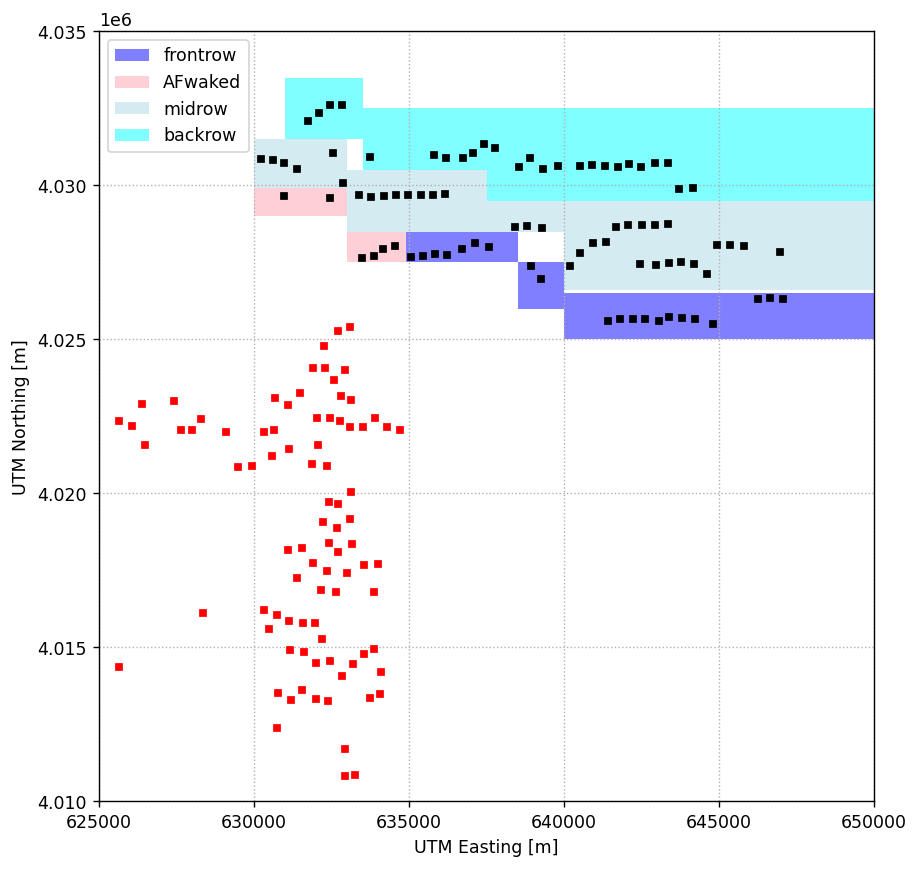

In [6]:
# Plot the domain
fig, ax = plt.subplots(figsize=(8,8), facecolor='w', dpi=125)

for x in KPturbdf.iterrows():    plt.plot(float(x[1][' x']), float(x[1][' y']), 'ks', markersize=4)
    
for x in AFturbdf.iterrows():    plt.plot(float(x[1][' x']), float(x[1][' y']), 'rs', markersize=4)

for grouping in allcategories:
    plotargs = grouping['plotargs']
    for ibox, box in enumerate(grouping['bboxes']):
        xlims = box[0]
        ylims = box[1]
        kwargs = plotargs.copy()
        if ibox==0: kwargs['label'] = grouping['label']
        rect = patches.Rectangle((xlims[0], ylims[0]), (xlims[1]-xlims[0]), (ylims[1]-ylims[0]),  **kwargs)
        ax.add_patch(rect)

ax.set_aspect('auto')
ax.set_xlim([625000,  650000])
ax.set_ylim([4010000, 4035000])
ax.set_xlabel('UTM Easting [m]')
ax.set_ylabel('UTM Northing [m]')
ax.grid(ls=':')
ax.legend()

In [17]:
print('%-10s Num turbines'%'CATEGORY')
for d in allcategories:
    print('%-10s %i'%(d['label'], len(d['turblist'])))

CATEGORY   Num turbines
frontrow   21
AFwaked    6
midrow     36
backrow    25


In [10]:
21+6+36+25

88